In [1]:
import copy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def read_group(all_charge, n):
    group_charges = []
    for i_frame in all_charge:
        types = np.int32(np.array(i_frame).T[1])
        charges = np.float32(np.array(i_frame)[types==n].T[2])
        group_charges.append(charges)
    return group_charges

In [3]:
def read_charges(file):
    dump_file = open(file, "r")
    number_of_frame = 0
    all_data = []
    for dump_line in dump_file:
        if len(dump_line.split())>1:
            if dump_line.split()[1]=='TIMESTEP': # new frame
                counter_of_line = 0
                number_of_frame += 1
                frame = []
                if number_of_frame>1:
                    all_data.append(frame)
        counter_of_line += 1
        if counter_of_line > 9:
            id, type, q, _, _, _ = dump_line.split()
            frame.append([np.int32(id), np.int32(type), np.float32(q)])
    all_data.append(frame)
    return all_data

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [5]:
fontsize = 15
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]

In [6]:
n_bins = 200
all_charge = read_charges(file="dump.lammpstrj")
qSi = read_group(all_charge, 1)
qO = read_group(all_charge, 2)

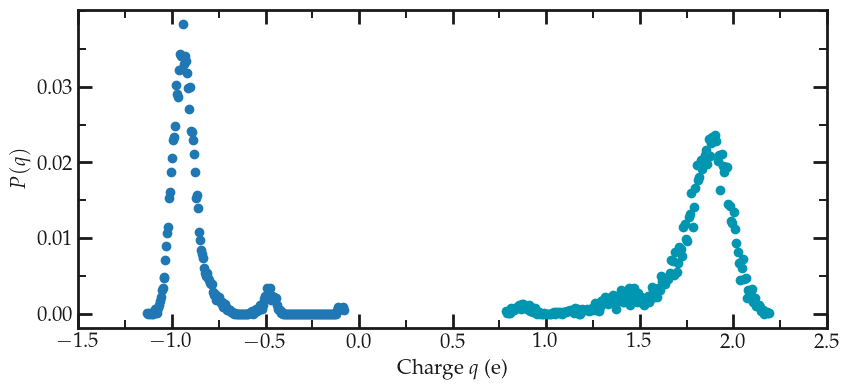

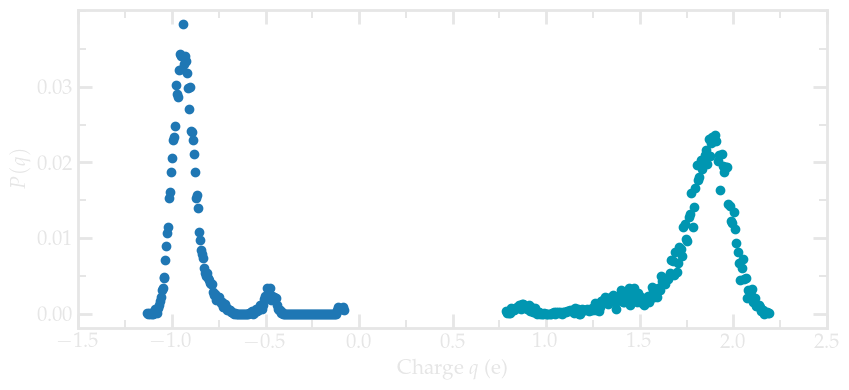

In [7]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(24, 4))
    ax1 = fig.add_subplot(131)
    occurence, charge = np.histogram(qSi, bins=n_bins)
    charge = charge[:-1]
    plt.plot(charge, occurence/np.sum(occurence), 'o', color=myblue, label="Si")
    occurence, charge = np.histogram(qO, bins=n_bins)
    charge = charge[:-1]
    plt.plot(charge, occurence/np.sum(occurence), 'o', label="O")
    #plt.plot(step/2, qSi, linewidth = 2, color=myblue)
    divider = make_axes_locatable(ax1)
    ax1.set_xlabel(r"Charge $q$ (e)", fontdict=font)
    ax1.set_ylabel(r"$P(q)$", fontdict=font)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=2, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(2)
    ax1.spines["bottom"].set_linewidth(2)
    ax1.spines["left"].set_linewidth(2)
    ax1.spines["right"].set_linewidth(2)
    ax1.set_xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
    ax1.set_yticks([0, 0.01, 0.02, 0.03])
    minor_locator_y = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator_y)
    minor_locator_x = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)

    fig.tight_layout()
    if mode == 'light':
        pass
        plt.savefig('deformed-distribution-charge-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/reaxff/deformed-distribution-charge-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        pass
        plt.savefig('deformed-distribution-charge-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/reaxff/deformed-distribution-charge-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)        
    plt.show()